## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
#%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df=pd.merge(mouse_metadata,study_results,on = "Mouse ID")
# Display the data table for preview
mouse_df.sort_values("Mouse ID", inplace = True)
mouse_df#.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [2]:
## Checking the number of mice.
## Also looking at the number of values in each column and investigating for null values
#mouse_df.isnull().any()
#mouse_df.dtypes
count = mouse_df.groupby(by = "Mouse ID")
mouse_num = len(count)
print("The number of mice in this experiement is " + str(mouse_num))

The number of mice in this experiement is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
908,g989,Propriva,Female,21,26,0,45.000000,0
916,g989,Propriva,Female,21,26,20,55.326122,1
915,g989,Propriva,Female,21,26,15,53.442020,0


In [4]:
#Set index to the Mouse ID
mouse_df = mouse_df.set_index('Mouse ID')


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_df = mouse_df.drop('g989', axis=0)
mouse_df


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,30,59.523197,1
a203,Infubinol,Female,20,23,35,61.931650,2
a203,Infubinol,Female,20,23,25,56.793208,1
a203,Infubinol,Female,20,23,20,55.173336,1
a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,20,57.898778,2
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3


In [6]:
# Checking the number of mice in the clean DataFrame.
count = mouse_df.groupby(by = "Mouse ID")
mouse_num = len(count)
print("The number of mice in this experiement is " + str(mouse_num))

The number of mice in this experiement is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drugs = mouse_df["Drug Regimen"]
drugs_name = pd.unique(drugs)

tumor_vol1df = mouse_df[['Drug Regimen', 'Tumor Volume (mm3)']]

tumor_vol1df=tumor_vol1df.groupby("Drug Regimen")
mean=round(tumor_vol1df.mean(),2)
mean.rename(columns = {'Tumor Volume (mm3)': 'Mean'}, inplace = True)
median=round(tumor_vol1df.median(),2)
median.rename(columns = {'Tumor Volume (mm3)': 'Median'}, inplace = True)
var=round(tumor_vol1df.var(),2)
var.rename(columns = {'Tumor Volume (mm3)': 'Variance'}, inplace = True)
std=round(tumor_vol1df.std(),2)
std.rename(columns = {'Tumor Volume (mm3)': 'Standard Deviation'}, inplace = True)
sem=round(tumor_vol1df.sem(),2)
sem.rename(columns = {'Tumor Volume (mm3)': 'Standard Error Measurment'}, inplace = True)

summary_table=pd.merge(mean, median, on = 'Drug Regimen', how = 'right')
summary_table=pd.merge(summary_table, var, on = 'Drug Regimen', how = 'right')
summary_table=pd.merge(summary_table, std, on = 'Drug Regimen', how = 'right')
summary_table=pd.merge(summary_table, sem, on = 'Drug Regimen', how = 'right')
summary_table

,Mean,Median,Variance,Standard Deviation,Standard Error Measurment
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_vol2=mouse_df.groupby(["Drug Regimen"]).agg({
        "Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']
})
tumor_vol2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

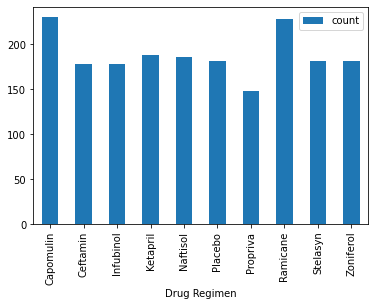

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_df = mouse_df.groupby(["Drug Regimen"]).size().to_frame(name = 'count').reset_index()
count_chart = bar_df.plot.bar(x='Drug Regimen', y='count', rot=90)


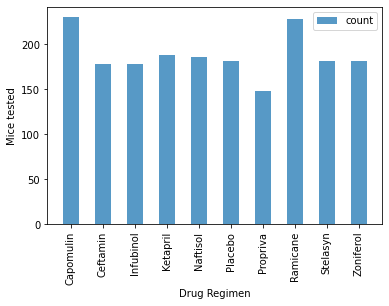

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

y_bar = bar_df["count"]
x_bar= bar_df["Drug Regimen"]
plt.bar(x_bar, bar_df["count"], width=0.5, label = 'count', alpha=0.75, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice tested")
plt.xticks(rotation=90)
plt.legend(loc="upper right")

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
